In [ ]:
!pip install sentinelsat cdsapi
!pip install SentinelAPI
!pip install geojson_to_wkt
!pip install python-dotenv
!pip install sentinelhub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement SentinelAPI (from versions: none)
ERROR: No matching distribution found for SentinelAPI
ERROR: Could not find a version that satisfies the requirement geojson_to_wkt (from versions: none)
ERROR: No matching distribution found for geojson_to_wkt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.6/165.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
from datetime import datetime, timedelta

from __future__ import annotations
import base64
import io
import json
import os
import textwrap
from dataclasses import dataclass
from datetime import datetime
from pathlib import Path
from typing import Dict, List, Sequence, Tuple

import matplotlib
matplotlib.use("Agg")  # headless backend
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
from geopy.geocoders import Nominatim
import os, json, shutil, py_compile


uploaded = files.upload()
# Create folder
os.makedirs("/content/geodata", exist_ok=True)

# Move files into correct folders
shutil.move("station_buffer.geojson", "/content/geodata/station_buffer.geojson")
shutil.move("station_points.geojson", "/content/geodata/station_points.geojson")
shutil.move("air_quality_stations_daily.csv", "/content/air_quality_stations_daily.csv")
py_compile.compile("ligsat.py", doraise=True)

from ligsat import read_combine, transform_satellite_data
# Create folder
DATA_FOLDER = "/content/satellite_data"
os.makedirs(DATA_FOLDER, exist_ok=True)

# Move files into correct folders
shutil.move("AER_AI_340_380.json", "/content/satellite_data/AER_AI_340_380.json")
shutil.move("CH4.json", "/content/satellite_data/CH4.json")
shutil.move("CO.json", "/content/satellite_data/CO.json")
shutil.move("HCHO.json", "/content/satellite_data/HCHO.json")
shutil.move("NGSI_satellite.json", "/content/satellite_data/NGSI_satellite.json")
shutil.move("NO2.json", "/content/satellite_data/NO2.json")
shutil.move("O3.json", "/content/satellite_data/O3.json")
shutil.move("SO2.json", "/content/satellite_data/SO2.json")

variables = ["O3", "SO2", "NO2", "CH4", "CO", "HCHO", "AER_AI_340_380"]
DATA_FOLDER = "/content/satellite_data"

combined = read_combine(variables, DATA_FOLDER)
entities = transform_satellite_data("SatelliteAirQuality", combined)

with open(os.path.join(DATA_FOLDER, "NGSI_satellite_data.json"), "w", encoding="utf-8") as f:
    json.dump(entities, f, indent=2, ensure_ascii=False)

Saving AER_AI_340_380.json to AER_AI_340_380.json
Saving air_quality_stations_daily.csv to air_quality_stations_daily.csv
Saving CH4.json to CH4.json
Saving CO.json to CO.json
Saving config_sentinel.ini to config_sentinel.ini
Saving HCHO.json to HCHO.json
Saving ligsat.py to ligsat.py
Saving NGSI_satellite.json to NGSI_satellite.json
Saving NO2.json to NO2.json
Saving O3.json to O3.json
Saving satellite_agents.py to satellite_agents.py
Saving SO2.json to SO2.json
Saving station_buffer.geojson to station_buffer.geojson
Saving station_points.geojson to station_points.geojson
[INFO] Read 8372 records from /content/satellite_data/O3.json
[INFO] Read 8372 records from /content/satellite_data/SO2.json
[INFO] Read 8372 records from /content/satellite_data/NO2.json
[INFO] Read 8372 records from /content/satellite_data/CH4.json
[INFO] Read 8372 records from /content/satellite_data/CO.json
[INFO] Read 8372 records from /content/satellite_data/HCHO.json
[INFO] Read 8372 records from /content/sate

In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.96.1
    Uninstalling openai-1.96.1:
      Successfully uninstalled openai-1.96.1


In [ ]:
pip install openai==0.28

  Using cached openai-0.28.0-py3-none-any.whl.metadata (13 kB)
Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.97.0
    Uninstalling openai-1.97.0:
      Successfully uninstalled openai-1.97.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-openai 0.3.28 requires openai<2.0.0,>=1.86.0, but you have openai 0.28.0 which is incompatible.


In [ ]:
import os, openai
openai.api_key = os.getenv("OPENAI_API_KEY")  # ou la mettre en dur, si tu assumes que c’est sécurisé


Ask me (type 'exit' to quit)

Audience (public/pro) [public]: expert
You: pollution dans blois


────────────────────────────── 🌍 Air‑quality snapshot in Paris (beginning → today) ───────────────────────────────

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Dominant pollutant: CH4 averaging 207.8 µg/m³. 0 spikes detected above μ+2σ.                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Statistics ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  • CH4: 207.78                                                                                                  │
│  • CO: 0.02                                                                                                     │
│  • HCHO: 0.00                                                                                                   │
│  • NO2: 0.00                                                                                                    │
│  • O3: 0.15                                                                                                     │
│  • SO2: 0.00                                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── Anomalies ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  • Ø                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Interpretation ─────────────────────────────────────────────────╮
│                                                                                                                 │
│  • Observed trends: CH4: stable, CO: en hausse, HCHO: en hausse, NO2: en hausse, O3: decreasing, SO2: en        │
│    hausse.                                                                                                      │
│  • No significant spikes detected over the selected period.                                                     │
│  • 16744 records spanning 364 distinct days provide adequate granularity for a reliable overview.               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Tendances normalisées

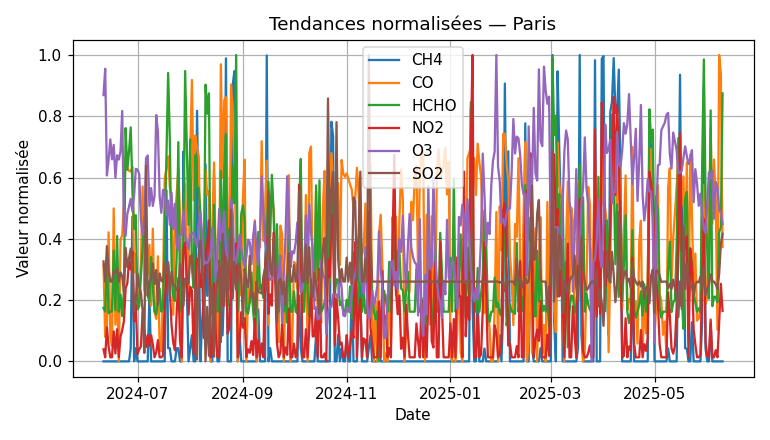

───────────────────────────────────────────────────── Logger ──────────────────────────────────────────────────────

Pipeline summary:

------------------------------------------------------------

You: what is pollution in blois


────────────────────────────── 🌍 Air‑quality snapshot in Blois (beginning → today) ───────────────────────────────

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Dominant pollutant: CH4 averaging 207.8 µg/m³. 0 spikes detected above μ+2σ.                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Statistics ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  • CH4: 207.78                                                                                                  │
│  • CO: 0.02                                                                                                     │
│  • HCHO: 0.00                                                                                                   │
│  • NO2: 0.00                                                                                                    │
│  • O3: 0.15                                                                                                     │
│  • SO2: 0.00                                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── Anomalies ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  • Ø                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Interpretation ─────────────────────────────────────────────────╮
│                                                                                                                 │
│  • Observed trends: CH4: stable, CO: en hausse, HCHO: en hausse, NO2: en hausse, O3: decreasing, SO2: en        │
│    hausse.                                                                                                      │
│  • No significant spikes detected over the selected period.                                                     │
│  • 16744 records spanning 364 distinct days provide adequate granularity for a reliable overview.               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Tendances normalisées

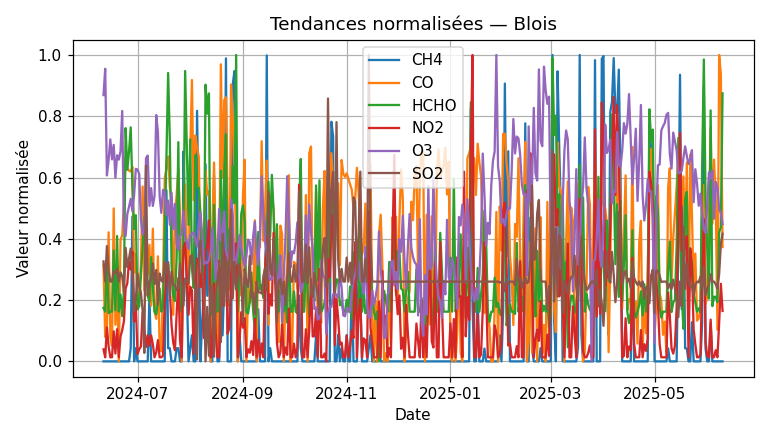

───────────────────────────────────────────────────── Logger ──────────────────────────────────────────────────────

Pipeline summary:

------------------------------------------------------------

KeyboardInterrupt: Interrupted by user

In [ ]:
# satellite_swarm_v6.py 🚀
"""
Pipeline **Satellite Swarm** – v6 (stable)
=========================================
Architecture : **Explore → Answer Questions → Structure Answers → Present**

Cette version actualise le prototype précédent pour qu’il reflète de manière
plus explicite le processus de *data‑storytelling* en quatre phases décrit par
El Outa et al. [2023] : Explore, Answer Questions, Structure Answers, Present.

Le cœur algorithmique et les variables d’environnement **restent inchangés** ;
seules la formation du récit et la présentation sont enrichies afin de fournir
une interprétation textuelle plus détaillée des résultats.

Variables d’environnement
-------------------------
```
OPENAI_API_KEY (facultatif)  # active l’extraction LLM et la narration
DATA_FOLDER    (déf. ./satellite_data)  # dossier contenant NGSI_satellite_data.json
GPT_MODEL      (déf. gpt-4o-mini)
```
"""
from __future__ import annotations

# ─── Imports ───────────────────────────────────────────────────────────────
import base64, io, json, os, re, textwrap
from dataclasses import dataclass
from pathlib import Path
from typing import Dict, List, Optional, Tuple

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

try:
    from rich.console import Console
    from rich.markdown import Markdown
    from rich.panel import Panel
    from rich.rule import Rule
    from rich.text import Text
except ImportError:  # fallback simple terminal
    class Console:  # type: ignore
        def print(self, *a, **k): print(*a)
    Markdown = lambda x: x          # type: ignore
    Panel = lambda x, **k: x        # type: ignore
    Rule = lambda x="": "-" * 40    # type: ignore
    Text = str                      # type: ignore

from dotenv import load_dotenv
import openai
from geopy.geocoders import Nominatim

# ─── Config ────────────────────────────────────────────────────────────────
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")
rcParams.update({"figure.dpi": 110, "font.size": 10})
DATA_FOLDER = Path(os.getenv("DATA_FOLDER", "./satellite_data"))
NGSI_FILE   = DATA_FOLDER / "NGSI_satellite_data.json"
GPT_MODEL   = os.getenv("GPT_MODEL", "gpt-4o-mini")

# ─── Logger ────────────────────────────────────────────────────────────────
class PipelineLogger:
    """Collecte les étapes clefs pour afficher un récapitulatif."""

    def __init__(self):
        self.steps: List[dict] = []

    def log(self, step: str, details: dict):
        self.steps.append({"step": step, "details": details})

    def summary(self) -> str:
        return "\n".join(
            ["Pipeline summary:"]
            + [f"• {s['step']}: " + ", ".join(f"{k}={v}" for k, v in s["details"].items()) for s in self.steps]
        )

LOGGER = PipelineLogger()

# ─── Dataclasses ───────────────────────────────────────────────────────────
@dataclass
class Query:
    city: str
    data_type: str
    pollutant: Optional[str]
    start: Optional[str]
    end: Optional[str]
    coords: Tuple[Optional[float], Optional[float]]
    audience: str
    lang: str

@dataclass
class Findings:
    available: bool
    stats: Dict[str, float]
    anomalies: List[float]
    charts: Dict[str, Tuple[str, str]]
    pollutants: Dict[str, float]
    data_path: Path
    df_columns: List[str]
    df_shape: Tuple[int, int]

@dataclass
class Narrative:
    title: str
    summary: str
    sections: Dict[str, List[str]]
    explanation: List[str]  # nouvelles phrases d’interprétation

# ─── Helpers ───────────────────────────────────────────────────────────────
_LAT = re.compile(r"[àâçéèêëîïôûùüÿœæ]", re.I)
lang = lambda t: "fr" if _LAT.search(t) else "en"

_EXTRACT_FN = {
    "name": "extract_parameters",
    "description": "Extract city, data_type, pollutant, date_from, date_to from user request",
    "parameters": {
        "type": "object",
        "properties": {
            "city": {"type": "string"},
            "data_type": {
                "type": "string",
                "enum": ["drought", "water table", "pollution"],
            },
            "pollutant": {"type": "string"},
            "date_from": {"type": "string", "format": "date"},
            "date_to": {"type": "string", "format": "date"},
        },
        "required": ["city", "data_type"],
    },
}

# ─── Explore Phase ─────────────────────────────────────────────────────────
class ExploreAgent:
    """Collecte et interprète la requête utilisateur pour préparer l’analyse."""

    _CITY_RE = re.compile(r"\b(?:in|à)\s+([A-Za-zÀ-ÖØ-öø-ÿ-]+)")

    def __init__(self):
        self.geo = Nominatim(user_agent="swarm-explore")

    # --- Méthodes internes -------------------------------------------------
    def _fallback(self, prompt: str, audience: str) -> Query:
        """Extraction « naïve » quand le LLM n’est pas disponible."""
        m = self._CITY_RE.search(prompt.lower())
        city = m.group(1).capitalize() if m else "Paris"
        dates = re.findall(r"(\d{4}-\d{2}-\d{2})", prompt)
        start, end = (dates[0], dates[1]) if len(dates) >= 2 else (None, None)
        return Query(city, "pollution", None, start, end, (None, None), audience, lang(prompt))

    def _llm(self, prompt: str, audience: str) -> Optional[Query]:
        if not openai.api_key:
            return None
        try:
            r = openai.ChatCompletion.create(
                model=GPT_MODEL,
                messages=[{"role": "user", "content": prompt}],
                functions=[_EXTRACT_FN],
                function_call={"name": "extract_parameters"},
            )
            a = json.loads(r.choices[0].message.function_call.arguments)
            city, dt = a["city"], a["data_type"]
            pollutant = a.get("pollutant")
            start, end = a.get("date_from"), a.get("date_to")
            # Gestion de la mention d’une année isolée
            if not (start and end):
                y = re.search(r"\b(\d{4})\b", prompt)
                year = y.group(1) if y else None
                if year:
                    start = start or f"{year}-01-01"
                    end = end or f"{year}-12-31"
            loc = self.geo.geocode(city)
            coords = (loc.latitude, loc.longitude) if loc else (None, None)
            q = Query(city, dt, pollutant, start, end, coords, audience, lang(prompt))
            LOGGER.log("Explore", q.__dict__)
            return q
        except Exception as e:
            LOGGER.log("Explore", {"err": str(e)})
            return None

    # --- API publique ------------------------------------------------------
    def parse(self, prompt: str, audience: str = "public") -> Query:
        """Retourne un objet *Query* prêt pour la phase ‘Answer Questions’."""
        return self._llm(prompt, audience) or self._fallback(prompt, audience)

# ─── Answer Questions Phase ────────────────────────────────────────────────
class AnswerAgent:
    """Extrait les statistiques pertinentes pour répondre aux questions."""

    POLLUTANTS = [
        "O3",
        "SO2",
        "NO2",
        "CH4",
        "CO",
        "HCHO",
        "AER_AI",
        "PM2.5",
        "PM10",
    ]

    # --- Hydratation des données -----------------------------------------
    def _read(self):
        if not NGSI_FILE.exists():
            LOGGER.log("Answer", {"warn": "data file missing"})
            return []
        try:
            raw = json.loads(NGSI_FILE.read_text("utf-8"))
            return raw.get("entities", raw) if isinstance(raw, dict) else raw
        except Exception as e:
            LOGGER.log("Answer", {"err": str(e)})
            return []

    # --- Helpers ----------------------------------------------------------
    @staticmethod
    def _flatten(rec: dict) -> dict:
        if "entities" in rec and isinstance(rec["entities"], list):
            rec = rec["entities"][0]
        return {
            k: (v["value"] if isinstance(v, dict) and "value" in v else v)
            for k, v in rec.items()
        }

    def _to_df(self, ents):
        return pd.DataFrame([self._flatten(e) for e in ents])

    @staticmethod
    def _ts(df):
        for k in ("dateObserved", "timestamp", "date", "time"):
            if k in df.columns:
                return pd.to_datetime(df[k], errors="coerce", utc=True)
        return pd.Series(dtype="datetime64[ns]")

    # --- Analyse principale ----------------------------------------------
    def analyse(self, q: Query):
        ents = self._read()
        if not ents:
            return (
                Findings(False, {}, [], {}, {}, Path(), [], (0, 0)),
                pd.DataFrame(),
            )

        df = self._to_df(ents)
        if "city" in df.columns:
            df = df[df["city"].str.lower() == q.city.lower()]
        df["date"] = self._ts(df)
        df.dropna(subset=["date"], inplace=True)

        if q.start and q.end:
            mask = (df["date"] >= pd.to_datetime(q.start, utc=True)) & (
                df["date"] <= pd.to_datetime(q.end, utc=True)
            )
            df = df.loc[mask]

        available = not df.empty
        stats: Dict[str, float] = {}
        anomalies: List[float] = []
        poll_vals: Dict[str, float] = {}

        if available:
            for p in self.POLLUTANTS:
                col = f"{p}_mean"
                if col in df.columns:
                    m = df[col].astype(float).mean(skipna=True)
                    stats[p] = poll_vals[p] = m
            if "value" in df.columns:
                v = df["value"].astype(float)
                anomalies = v[v > v.mean() + 2 * v.std()].tolist()

        out = Path.cwd() / f"prepared_{q.city.lower()}_{q.data_type}.csv"
        df.to_csv(out, index=False)
        return Findings(available, stats, anomalies, {}, poll_vals, out, list(df.columns), df.shape), df

# ─── Structure Answers Phase ──────────────────────────────────────────────
class StructureAgent:
    """Ordonne les messages en sections et ajoute une interprétation narrative."""

    # --- Helpers graphiques ----------------------------------------------
    @staticmethod
    def _b64(fig):
        buf = io.BytesIO()
        fig.tight_layout()
        fig.savefig(buf, format="png")
        plt.close(fig)
        return base64.b64encode(buf.getvalue()).decode()

    def _hist(self, df, f):
        if "value" in df.columns and not df.empty:
            fig, ax = plt.subplots(figsize=(5, 3))
            ax.hist(df["value"].astype(float), bins=15)
            ax.set_title("Distribution des valeurs")
            f.charts["hist"] = (self._b64(fig), "Distribution")

    def _trends(self, df, city, f):
        if "date" not in df.columns or df.empty:
            return
        g = (
            df.sort_values("date")
            .groupby("date")
            .mean(numeric_only=True)
            .reset_index()
        )
        if g.empty:
            return
        fig, ax = plt.subplots(figsize=(7, 4))
        colors = plt.cm.tab10.colors
        plotted = False
        for idx, p in enumerate(sorted(f.pollutants)):
            col = f"{p}_mean"
            if col not in g.columns or g[col].isna().all():
                continue
            s = g[col].astype(float)
            vmin, vmax = s.min(), s.max()
            norm = (s - vmin) / (vmax - vmin) if vmax != vmin else s
            ax.plot(g["date"], norm, label=p, color=colors[idx % len(colors)])
            plotted = True
        if plotted:
            ax.set_title(f"Tendances normalisées — {city}")
            ax.set_xlabel("Date")
            ax.set_ylabel("Valeur normalisée")
            ax.legend()
            ax.grid(True)
            f.charts["trends"] = (self._b64(fig), "Tendances normalisées")
        else:
            plt.close(fig)

    # --- Construction du récit -------------------------------------------
    def _interpret(self, q: Query, f: Findings, df: pd.DataFrame) -> List[str]:
        """Génère des phrases supplémentaires d’interprétation."""
        expl: List[str] = []

        # Tendances simples (petit calcul de pente)
        if "date" in df.columns and not df.empty and f.pollutants:
            trend_lines: List[str] = []
            g = (
                df.sort_values("date")
                .groupby("date")
                .mean(numeric_only=True)
                .reset_index()
            )
            for p in sorted(f.pollutants):
                col = f"{p}_mean"
                if col in g.columns and g[col].notna().any():
                    start, end = g[col].iloc[0], g[col].iloc[-1]
                    slope = end - start
                    if abs(slope) < 1e-6:  # quasi‑stable
                        trend = "stable" if q.lang == "fr" else "stable"
                    else:
                        trend = "en hausse" if slope > 0 else "en baisse" if q.lang == "fr" else "increasing" if slope > 0 else "decreasing"
                    trend_lines.append(f"{p}: {trend}")
            if trend_lines:
                if q.lang == "fr":
                    expl.append("Tendances observées : " + ", ".join(trend_lines) + ".")
                else:
                    expl.append("Observed trends: " + ", ".join(trend_lines) + ".")

        # Anomalies
        if f.anomalies:
            if q.lang == "fr":
                expl.append(
                    f"{len(f.anomalies)} épisodes dépassent le seuil μ+2σ, suggérant des pics de pollution potentiellement dangereux pour les populations vulnérables."
                )
            else:
                expl.append(
                    f"{len(f.anomalies)} episodes exceed the μ+2σ threshold, indicating potentially harmful pollution spikes for sensitive groups."
                )
        else:
            if q.lang == "fr":
                expl.append("Aucun pic significatif n’a été détecté sur la période considérée.")
            else:
                expl.append("No significant spikes detected over the selected period.")

        # Couverture des données
        if q.lang == "fr":
            expl.append(
                f"{df.shape[0]} enregistrements couvrent {len(df['date'].dt.date.unique())} journées distinctes, offrant une granularité suffisante pour un aperçu fiable."
            )
        else:
            expl.append(
                f"{df.shape[0]} records spanning {len(df['date'].dt.date.unique())} distinct days provide adequate granularity for a reliable overview."
            )

        return expl

    def build(self, q: Query, f: Findings, df: pd.DataFrame):
        """Génère un *data‑story* structuré et interprétatif."""
        # Ajout des graphiques
        self._hist(df, f)
        self._trends(df, q.city, f)

        # Si aucune donnée --------------------------------------------------
        if not f.available:
            msg = "Aucune donnée disponible." if q.lang == "fr" else "No data available."
            return Narrative("❗", msg, {}, [])

        # ----------  Titre accrocheur  ----------
        if q.lang == "fr":
            title = f"🌍 Qualité de l'air à {q.city} ({q.start or 'début'} → {q.end})"
        else:
            title = f"🌍 Air‑quality snapshot in {q.city} ({q.start or 'beginning'} → {q.end or 'today'})"

        # ----------  Résumé narratif  ----------
        if f.pollutants:
            top_poll = max(f.pollutants, key=f.pollutants.get)
            top_val = f.pollutants[top_poll]
            if q.lang == "fr":
                summary = (
                    f"Le polluant dominant est **{top_poll}** avec une concentration moyenne de **{top_val:.1f}** µg/m³. "
                    f"{len(f.anomalies)} pics au‑delà du seuil μ+2σ ont été détectés."
                )
            else:
                summary = (
                    f"Dominant pollutant: **{top_poll}** averaging **{top_val:.1f} µg/m³**. "
                    f"{len(f.anomalies)} spikes detected above μ+2σ."
                )
        else:
            summary = "Ø"

        # ----------  Sections détaillées  ----------
        mean_lines = [f"{p}: {v:.2f}" for p, v in sorted(f.pollutants.items())]
        anom_lines = [str(a) for a in f.anomalies[:10]] or ["Ø"]
        sections = {
            ("Statistiques" if q.lang == "fr" else "Statistics"): mean_lines,
            ("Anomalies" if q.lang == "fr" else "Anomalies"): anom_lines,
        }

        # ----------  Interprétation supplémentaire  ----------
        explanation = self._interpret(q, f, df)

        return Narrative(title, summary, sections, explanation)

# ─── Present Phase ────────────────────────────────────────────────────────
class PresentAgent:
    """Rend visible la narration – texte, sections, graphiques et interprétation."""

    def __init__(self):
        self.c = Console()

    def _display(self, n: Narrative, f: Findings):
        self.c.print(Rule(Text(n.title, style="bold cyan")))
        self.c.print(Panel(Markdown(n.summary)))

        # Sections structurées
        for t, lines in n.sections.items():
            self.c.print(Panel(Markdown("\n".join(f"- {l}" for l in lines)), title=t))

        # Phrases d’explication supplémentaires
        if n.explanation:
            expl_md = Markdown("\n".join(f"- {textwrap.fill(e, width=80)}" for e in n.explanation))
            self.c.print(Panel(expl_md, title="Interprétation" if n.title.startswith("🌍 Qualité") else "Interpretation"))

        # Graphiques encodés
        for _, (b64, ttl) in f.charts.items():
            self.c.print(ttl)
            try:
                from IPython.display import display, Image

                display(Image(data=base64.b64decode(b64), width=600))
            except Exception:
                pass

    def present(self, q: Query, n: Narrative, f: Findings):
        self._display(n, f)
        self.c.print(Rule("Logger"))
        self.c.print(LOGGER.summary())
        self.c.print("-" * 60)


# ─── Orchestration ─────────────────────────────────────────────────────────
EXPLORE, ANSWER, STRUCTURE, PRESENT = (
    ExploreAgent(),
    AnswerAgent(),
    StructureAgent(),
    PresentAgent(),
)


def ask(prompt: str, audience: str = "public"):
    LOGGER.steps.clear()
    q = EXPLORE.parse(prompt, audience)
    f, df = ANSWER.analyse(q)
    n = STRUCTURE.build(q, f, df)
    PRESENT.present(q, n, f)


# ─── CLI ────────────────────────────────────────────────────────────────────
if __name__ == "__main__":
    con = Console()
    con.print("Ask me (type 'exit' to quit)")
    aud = input("Audience (public/pro) [public]: ").strip().lower() or "public"
    while True:
        txt = input("You: ")
        if txt.lower() in {"exit", "quit"}:
            break
        ask(txt, aud)


Ask me (type 'exit' to quit)

/tmp/ipython-input-3296368625.py:433: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(series, labels=labels, showfliers=True)


────────────────────────────────────── 📊 Paris — multi-indicator synthesis ───────────────────────────────────────

╭──────────────────────────────────────────────────── Résumé ─────────────────────────────────────────────────────╮
│ Focus CH4, μ=207.78. Window 2024-06-11 → 2025-06-10. Anomalies (μ+2σ): 0.                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── Method ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│  • Source: Sentinel-5P (Copernicus).                                                                            │
│  • Aggregation: daily mean per station.                                                                         │
│  • Cleaning: remove invalid/cloudy; outliers > μ+2σ flagged.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── Data ──────────────────────────────────────────────────────╮
│                                                                                                                 │
│  • File: prepared_paris_pollution.csv                                                                           │
│  • Columns: 52                                                                                                  │
│  • Size: 16744 x 52                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Results (μ) ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  • CH4: 207.78                                                                                                  │
│  • CO: 0.02                                                                                                     │
│  • HCHO: 0.00                                                                                                   │
│  • NO2: 0.00                                                                                                    │
│  • O3: 0.15                                                                                                     │
│  • SO2: 0.00                                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Anomalies (μ+2σ) ────────────────────────────────────────────────╮
│                                                                                                                 │
│  • Ø                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── Notes ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│  • Comparison (0–1)                                                                                             │
│  • Boxplots (spread)                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

[Compared evolution (0–1)]

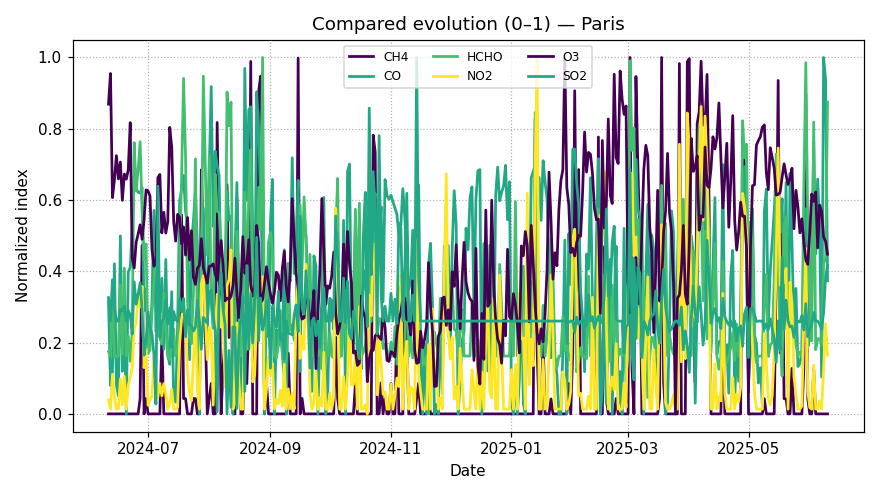

[Distribution by pollutant]

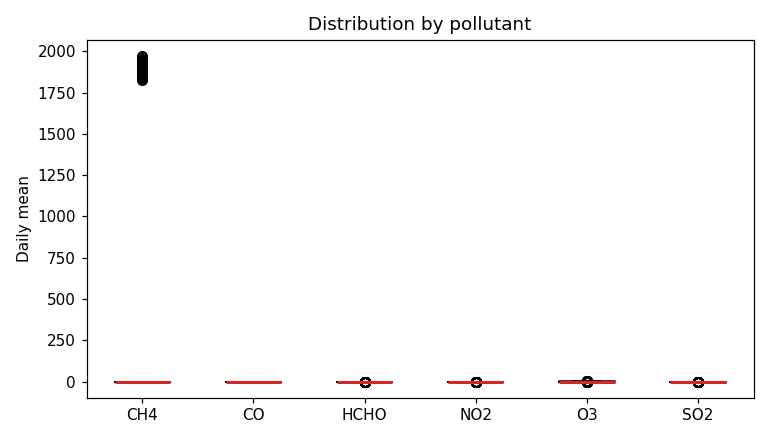

╭──────────────────────────────────────────── Notes d’interprétation ─────────────────────────────────────────────╮
│                                                                                                                 │
│  • No period provided. Using: 2024-06-11 → 2025-06-10 (based on available coverage).                            │
│  • Trends: CH4: ~0 (stable), CO: Δ=0.00 (↑), HCHO: Δ=0.00 (↑), NO2: Δ=0.00 (↑), O3: Δ=-0.04 (↓), SO2: Δ=0.00    │
│    (↑).                                                                                                         │
│  • No marked spikes detected.                                                                                   │
│  • 16744 records over 364 days.                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

───────────────────────────────────────────────────── Logger ──────────────────────────────────────────────────────

Pipeline summary:
• Answer: rows=16744, cols=52, used_start=2024-06-11, used_end=2025-06-10

------------------------------------------------------------

KeyboardInterrupt: Interrupted by user

In [ ]:
# satellite_swarm_v11.py 🚀
"""
Satellite Swarm – v11
- FR/EN auto selon la question
- Audience : Public (Martini Glass) / Pro (modules analytiques)
- Palettes demandées :
  * Public : #1F77B4, #FF7F0E, #2CA02C, #D62728
  * Expert : #440154, #22A884, #44BF70, #FDE725 (+ accent rouge #D62728)
- Gestion explicite de la fenêtre temporelle utilisée (si absente / hors couverture)
- Questions hors polluants : message + réponse basée sur données pollution
"""

from __future__ import annotations
import base64, io, json, os, re, textwrap
from dataclasses import dataclass
from pathlib import Path
from typing import Dict, List, Optional, Tuple

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

try:
    from rich.console import Console
    from rich.markdown import Markdown
    from rich.panel import Panel
    from rich.rule import Rule
    from rich.text import Text
except ImportError:
    class Console:
        def print(self, *a, **k): print(*a)
    Markdown = lambda x: x
    Panel = lambda x, **k: x
    Rule = lambda x="": "-" * 40
    Text = str

from dotenv import load_dotenv
import openai
from geopy.geocoders import Nominatim

# ── Config ─────────────────────────────────────────────────────────────────
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")
rcParams.update({"figure.dpi": 110, "font.size": 10})

DATA_FOLDER = Path(os.getenv("DATA_FOLDER", "./satellite_data"))
NGSI_FILE   = DATA_FOLDER / "NGSI_satellite_data.json"
GPT_MODEL   = os.getenv("GPT_MODEL", "gpt-4o-mini")

# ── Palettes par audience ──────────────────────────────────────────────────
# Public : simple, vive, contrastée
PALETTE_PUBLIC = ["#1F77B4",  # bleu vif
                  "#FF7F0E",  # orange chaud
                  "#2CA02C",  # vert frais
                  "#D62728"]  # rouge alerte

# Experts : sobre/analytique (Viridis-like)
PALETTE_EXPERT = ["#440154",  # bleu profond
                  "#22A884",  # vert clair
                  "#44BF70",  # turquoise
                  "#FDE725"]  # jaune clair
PALETTE_EXPERT_ACCENT = "#D62728"  # anomalies / seuils

# ── Logger ─────────────────────────────────────────────────────────────────
class PipelineLogger:
    def __init__(self):
        self.steps: List[dict] = []
    def log(self, step: str, details: dict):
        self.steps.append({"step": step, "details": details})
    def summary(self) -> str:
        lines = ["Pipeline summary:"]
        for s in self.steps:
            parts = ", ".join(f"{k}={v}" for k, v in s["details"].items())
            lines.append(f"• {s['step']}: {parts}")
        return "\n".join(lines)

LOGGER = PipelineLogger()

# ── Dataclasses ────────────────────────────────────────────────────────────
@dataclass
class Query:
    city: str
    data_type: str              # "pollution", "water table", "drought", ...
    pollutant: Optional[str]    # e.g., "O3", "NO2", ...
    start: Optional[str]
    end: Optional[str]
    coords: Tuple[Optional[float], Optional[float]]
    audience: str               # 'public' or 'pro'
    lang: str                   # 'fr' or 'en'
    time_given: bool            # l'utilisateur a-t-il fourni des dates ?
    non_pollutant_question: bool  # question hors périmètre pollution

@dataclass
class Findings:
    available: bool
    stats: Dict[str, float]
    anomalies: List[float]
    charts: Dict[str, Tuple[str, str]]
    pollutants: Dict[str, float]
    data_path: Path
    df_columns: List[str]
    df_shape: Tuple[int, int]
    used_start: Optional[str]
    used_end: Optional[str]
    notes: List[str]

@dataclass
class Narrative:
    title: str
    summary: str
    sections: Dict[str, List[str]]
    explanation: List[str]
    story_structure: str        # 'martini_glass' or 'modules'

# ── Helpers ────────────────────────────────────────────────────────────────
_LAT = re.compile(r"[àâçéèêëîïôûùüÿœæ]", re.I)
def detect_lang(text: str) -> str:
    return "fr" if _LAT.search(text) else "en"

KNOWN_POLLUTANTS = [
    "O3","SO2","NO2","CH4","CO","HCHO","AER_AI","PM2.5","PM10",
    "o3","so2","no2","ch4","co","hcho","aer_ai","pm2.5","pm10"
]

_EXTRACT_FN = {
    "name": "extract_parameters",
    "description": "Extract city, data_type, pollutant, date_from, date_to from user request",
    "parameters": {
        "type": "object",
        "properties": {
            "city": {"type": "string"},
            "data_type": {"type": "string", "enum": ["drought", "water table", "pollution"]},
            "pollutant": {"type": "string"},
            "date_from": {"type": "string", "format": "date"},
            "date_to": {"type": "string", "format": "date"},
        },
        "required": ["city"],
    },
}

def _normalize_pollutant(name: Optional[str]) -> Optional[str]:
    if not name:
        return None
    n = name.strip().upper().replace(" ", "")
    mapping = {"PM25":"PM2.5","PM2,5":"PM2.5","PM10":"PM10","NO₂":"NO2","SO₂":"SO2","O₃":"O3"}
    return mapping.get(n, n)

# ── Explore ────────────────────────────────────────────────────────────────
class ExploreAgent:
    """Extraction robuste + désambiguïsation + détection FR/EN."""

    _CITY_RE = re.compile(r"\b(?:in|at|à|au|en)\s+([A-Za-zÀ-ÖØ-öø-ÿ-]+)")
    _YEAR_RE = re.compile(r"\b(20\d{2}|19\d{2})\b")
    _DATE_RE = re.compile(r"(\d{4}-\d{2}-\d{2})")

    def __init__(self):
        self.geo = Nominatim(user_agent="swarm-explore")

    def _detect_pollutant(self, text: str) -> Optional[str]:
        for token in KNOWN_POLLUTANTS:
            if re.search(rf"\b{re.escape(token)}\b", text, flags=re.I):
                return _normalize_pollutant(token)
        return None

    def _infer_data_type(self, text: str, pol: Optional[str]) -> Tuple[str, bool]:
        t = text.lower()
        non_pollutant = False
        if any(w in t for w in [
            "pollution","qualité de l'air","air quality","pm10","no2","o3","co","so2","hcho","aer_ai"
        ]) or pol:
            return "pollution", non_pollutant
        if any(w in t for w in ["nappe","water table","groundwater","niveau de la nappe"]):
            non_pollutant = True; return "pollution", non_pollutant
        if any(w in t for w in ["sécheresse","drought"]):
            non_pollutant = True; return "pollution", non_pollutant
        return "pollution", non_pollutant

    def _choose_coords(self, city: str) -> Tuple[str, Tuple[Optional[float], Optional[float]]]:
        candidates = self.geo.geocode(city, exactly_one=False, addressdetails=True, limit=5)
        coords = (None, None); chosen_label = city
        if candidates:
            def score(loc):
                addr = (loc.raw or {}).get("address", {})
                cc = (addr.get("country_code") or "").lower()
                return cc in {"fr","de","it","es","pt","be","nl","lu","at","ie","pl","cz","sk","hu","ro","bg","se","fi","dk","gr","hr","si","mt","cy","ee","lv","lt"}
            chosen = sorted(candidates, key=lambda x: score(x), reverse=True)[0]
            coords = (chosen.latitude, chosen.longitude)
            chosen_label = chosen.address.split(",")[0]
        return chosen_label, coords

    def _fallback(self, prompt: str, audience: str) -> Query:
        lang = detect_lang(prompt)
        c = self._CITY_RE.search(prompt.lower())
        city = c.group(1).capitalize() if c else ("Paris" if lang=="fr" else "Paris")
        dates = self._DATE_RE.findall(prompt)
        if len(dates) >= 2:
            start, end, time_given = dates[0], dates[1], True
        elif len(dates) == 1:
            start, end, time_given = dates[0], None, True
        else:
            y = self._YEAR_RE.search(prompt)
            if y:
                year = y.group(1)
                start, end, time_given = f"{year}-01-01", f"{year}-12-31", True
            else:
                start, end, time_given = None, None, False
        pol = self._detect_pollutant(prompt)
        dt, non_poll = self._infer_data_type(prompt, pol)
        label, coords = self._choose_coords(city)
        return Query(label, dt, pol, start, end, coords, audience, lang, time_given, non_poll)

    def _llm(self, prompt: str, audience: str) -> Optional[Query]:
        if not openai.api_key:
            return None
        try:
            r = openai.ChatCompletion.create(
                model=GPT_MODEL,
                messages=[{"role": "user", "content": prompt}],
                functions=[_EXTRACT_FN],
                function_call={"name": "extract_parameters"},
            )
            a = json.loads(r.choices[0].message.function_call.arguments)
            lang = detect_lang(prompt)
            city = a.get("city") or ("Paris" if lang=="fr" else "Paris")
            pollutant = _normalize_pollutant(a.get("pollutant"))
            dt, non_poll = self._infer_data_type(prompt, pollutant)
            start, end = a.get("date_from"), a.get("date_to")
            time_given = bool(start or end or self._YEAR_RE.search(prompt))
            if not (start and end):
                y = self._YEAR_RE.search(prompt)
                if y:
                    year = y.group(1)
                    start = start or f"{year}-01-01"
                    end = end or f"{year}-12-31"
                    time_given = True
            label, coords = self._choose_coords(city)
            q = Query(label, dt, pollutant, start, end, coords, audience, lang, time_given, non_poll)
            LOGGER.log("Explore", q.__dict__)
            return q
        except Exception as e:
            LOGGER.log("Explore", {"err": str(e)})
            return None

    def parse(self, prompt: str, audience: str = "public") -> Query:
        return self._llm(prompt, audience) or self._fallback(prompt, audience)

# ── Answer ─────────────────────────────────────────────────────────────────
class AnswerAgent:
    """Charge NGSI, filtre, calcule, gère couverture (défaut/fallback)."""
    POLLUTANTS = ["O3","SO2","NO2","CH4","CO","HCHO","AER_AI","PM2.5","PM10"]

    def _read(self):
        if not NGSI_FILE.exists():
            LOGGER.log("Answer", {"warn": "data file missing"})
            return []
        try:
            raw = json.loads(NGSI_FILE.read_text("utf-8"))
            return raw.get("entities", raw) if isinstance(raw, dict) else raw
        except Exception as e:
            LOGGER.log("Answer", {"err": str(e)})
            return []

    @staticmethod
    def _flatten(rec: dict) -> dict:
        if "entities" in rec and isinstance(rec["entities"], list):
            rec = rec["entities"][0]
        return {k: (v["value"] if isinstance(v, dict) and "value" in v else v) for k, v in rec.items()}

    def _to_df(self, ents):
        return pd.DataFrame([self._flatten(e) for e in ents])

    @staticmethod
    def _ts(df):
        for k in ("dateObserved","timestamp","date","time"):
            if k in df.columns:
                return pd.to_datetime(df[k], errors="coerce", utc=True)
        return pd.Series(dtype="datetime64[ns]")

    def analyse(self, q: Query):
        ents = self._read()
        if not ents:
            note = "Aucune donnée chargée." if q.lang=="fr" else "No data loaded."
            return Findings(False, {}, [], {}, {}, Path(), [], (0,0), None, None, [note]), pd.DataFrame()

        df_all = self._to_df(ents)
        if "city" in df_all.columns:
            df_all["city"] = df_all["city"].astype(str)
        df_city = df_all[df_all.get("city","").str.lower() == q.city.lower()] if "city" in df_all.columns else df_all.copy()
        df_city["date"] = self._ts(df_city)
        df_city.dropna(subset=["date"], inplace=True)

        notes: List[str] = []
        if df_city.empty:
            msg = (f"Aucune donnée disponible pour {q.city}."
                   if q.lang=="fr" else f"No data available for {q.city}.")
            return Findings(False, {}, [], {}, {}, Path(), list(df_city.columns), df_city.shape, None, None, [msg]), df_city

        global_start = df_city["date"].min().date().isoformat()
        global_end   = df_city["date"].max().date().isoformat()

        # Filtres temporels
        if q.start or q.end:
            start = pd.to_datetime(q.start, utc=True) if q.start else None
            end   = pd.to_datetime(q.end, utc=True) if q.end else None
            df = df_city.copy()
            if start is not None:
                df = df[df["date"] >= start]
            if end is not None:
                df = df[df["date"] <= end]
            if df.empty:
                if q.lang=="fr":
                    notes.append(f"Période demandée hors couverture. Données disponibles : {global_start} → {global_end}. Réponse basée sur cette fenêtre.")
                else:
                    notes.append(f"Requested period out of coverage. Available data: {global_start} → {global_end}. Answer based on that window.")
                used_start, used_end = global_start, global_end
                df = df_city.copy()
            else:
                used_start = df["date"].min().date().isoformat()
                used_end   = df["date"].max().date().isoformat()
        else:
            used_start, used_end = global_start, global_end
            if q.lang=="fr":
                notes.append(f"Période non précisée. Fenêtre utilisée : {used_start} → {used_end} (selon la couverture des données).")
            else:
                notes.append(f"No period provided. Using: {used_start} → {used_end} (based on available coverage).")
            df = df_city.copy()

        available = not df.empty
        stats: Dict[str, float] = {}
        anomalies: List[float] = []
        poll_vals: Dict[str, float] = {}

        if available:
            for p in self.POLLUTANTS:
                col = f"{p}_mean"
                if col in df.columns:
                    m = df[col].astype(float).mean(skipna=True)
                    stats[p] = poll_vals[p] = m
            if "value" in df.columns:
                v = df["value"].astype(float)
                anomalies = v[v > v.mean() + 2*v.std()].tolist()

        out = Path.cwd() / f"prepared_{q.city.lower()}_{q.data_type}.csv"
        df.to_csv(out, index=False)
        LOGGER.log("Answer", {"rows": df.shape[0], "cols": len(df.columns), "used_start": used_start, "used_end": used_end})

        if q.non_pollutant_question:
            notes.append("La question sort de mon périmètre. Je suis spécialisé(e) en polluants atmosphériques ; je fournis la meilleure réponse possible à partir des données disponibles."
                         if q.lang=="fr" else
                         "The question is outside my scope. I specialize in air pollutants; I provide the best possible answer using available pollution data.")

        return Findings(available, stats, anomalies, {}, poll_vals, out, list(df.columns), df.shape, used_start, used_end, notes), df

# ── Structure ──────────────────────────────────────────────────────────────
class StructureAgent:
    """Public = Martini ; Pro = modules. Utilise palettes dédiées et accent anomalies."""

    @staticmethod
    def _b64(fig):
        buf = io.BytesIO()
        fig.tight_layout()
        fig.savefig(buf, format="png")
        plt.close(fig)
        return base64.b64encode(buf.getvalue()).decode()

    # Graphiques PUBLIC : polluant clé + lissage + histo (couleurs Public)
    def _public_key_trend(self, df, q: Query, f: Findings):
        if "date" not in df.columns or df.empty:
            return
        key = q.pollutant or (max(f.pollutants, key=f.pollutants.get) if f.pollutants else None)
        if not key:
            return
        col = f"{key}_mean"
        if col not in df.columns:
            return
        g = df[["date", col]].dropna().sort_values("date")
        if g.empty:
            return
        g[col] = g[col].astype(float)
        g["smooth"] = g[col].rolling(window=7, min_periods=1).mean()

        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(g["date"], g["smooth"], linewidth=2.2, color=PALETTE_PUBLIC[0])  # bleu
        ax.set_title(f"{key} — tendance lissée ({q.city})" if q.lang=="fr" else f"{key} — smoothed trend ({q.city})")
        ax.set_xlabel("Date" if q.lang=="fr" else "Date")
        ax.set_ylabel("Niveau moyen (lissé)" if q.lang=="fr" else "Smoothed mean")
        ax.grid(True, linestyle=":")
        f.charts["public_trend"] = (self._b64(fig), f"Tendance {key} (lissée)" if q.lang=="fr" else f"{key} trend (smoothed)")

        fig2, ax2 = plt.subplots(figsize=(5, 3))
        ax2.hist(g[col], bins=15, color=PALETTE_PUBLIC[1], alpha=0.9, edgecolor="black")  # orange
        ax2.set_title(f"{key} — répartition des valeurs" if q.lang=="fr" else f"{key} — value distribution")
        ax2.set_xlabel("Valeurs" if q.lang=="fr" else "Values")
        ax2.set_ylabel("Fréquence" if q.lang=="fr" else "Frequency")
        f.charts["public_hist"] = (self._b64(fig2), f"Répartition {key}" if q.lang=="fr" else f"{key} distribution")

    # Graphiques PRO : multi-tendances + boxplots (palette Expert)
    def _expert_multi_trends(self, df, q: Query, f: Findings):
        if "date" not in df.columns or df.empty:
            return
        g = df.sort_values("date").groupby("date").mean(numeric_only=True).reset_index()
        if g.empty:
            return

        focus = q.pollutant
        fig, ax = plt.subplots(figsize=(8, 4.5))
        plotted = False
        for i, p in enumerate(sorted(f.pollutants)):
            col = f"{p}_mean"
            if col in g.columns and g[col].notna().any():
                s = g[col].astype(float)
                vmin, vmax = s.min(), s.max()
                norm = (s - vmin) / (vmax - vmin) if vmax != vmin else s
                lw = 2.6 if (focus and p == focus) else 1.8
                ax.plot(g["date"], norm, label=p, linewidth=lw, color=PALETTE_EXPERT[i % len(PALETTE_EXPERT)])
                plotted = True
        if plotted:
            ax.set_title(f"Évolution comparée (0–1) — {q.city}" if q.lang=="fr" else f"Compared evolution (0–1) — {q.city}")
            ax.set_xlabel("Date"); ax.set_ylabel("Indice normalisé" if q.lang=="fr" else "Normalized index")
            ax.legend(ncol=3, fontsize=8)
            ax.grid(True, linestyle=":")
            f.charts["expert_trends"] = (self._b64(fig), "Évolution comparée (0–1)" if q.lang=="fr" else "Compared evolution (0–1)")

        series, labels = [], []
        for p in sorted(f.pollutants):
            col = f"{p}_mean"
            if col in df.columns and df[col].notna().any():
                series.append(df[col].astype(float).dropna()); labels.append(p)
        if series:
            fig2, ax2 = plt.subplots(figsize=(7, 4))
            bp = ax2.boxplot(series, labels=labels, showfliers=True)
            for median in bp['medians']:
                median.set_color(PALETTE_EXPERT_ACCENT)  # rouge pour médianes
                median.set_linewidth(2)
            ax2.set_title("Distribution par polluant" if q.lang=="fr" else "Distribution by pollutant")
            ax2.set_ylabel("Moyenne journalière" if q.lang=="fr" else "Daily mean")
            f.charts["expert_box"] = (self._b64(fig2), "Distribution par polluant" if q.lang=="fr" else "Distribution by pollutant")

    def _interpret(self, q: Query, f: Findings, df: pd.DataFrame) -> List[str]:
        lines: List[str] = []
        # Notes (couverture, hors périmètre)
        for note in f.notes:
            lines.append(note)

        # Tendances
        if "date" in df.columns and not df.empty and f.pollutants:
            g = df.sort_values("date").groupby("date").mean(numeric_only=True).reset_index()
            trends = []
            pollu_list = [q.pollutant] if q.pollutant else sorted(f.pollutants)
            for p in pollu_list:
                if not p:
                    continue
                col = f"{p}_mean"
                if col in g.columns and g[col].notna().any():
                    start, end = g[col].iloc[0], g[col].iloc[-1]
                    slope = end - start
                    if q.audience == "public":
                        t = f"{p}: stable" if abs(slope) < 1e-6 else (f"{p}: en hausse" if slope > 0 else f"{p}: en baisse")
                        t_en = f"{p}: stable" if abs(slope) < 1e-6 else (f"{p}: increasing" if slope > 0 else f"{p}: decreasing")
                    else:
                        t = f"{p}: ~0 (stable)" if abs(slope) < 1e-6 else (f"{p}: Δ={slope:.2f} (↑)" if slope > 0 else f"{p}: Δ={slope:.2f} (↓)")
                        t_en = t
                    trends.append(t if q.lang=="fr" else t_en)
            if trends:
                lines.append(("Tendances : " if q.lang=="fr" else "Trends: ") + ", ".join(trends) + ".")

        # Anomalies
        if f.anomalies:
            lines.append("Quelques jours présentent des pics inhabituels."
                         if q.audience=="public" and q.lang=="fr"
                         else "Some days show unusual peaks." if q.audience=="public"
                         else (f"{len(f.anomalies)} épisodes > μ+2σ." if q.lang=="fr" else f"{len(f.anomalies)} episodes > μ+2σ."))
        else:
            lines.append("Pas de pic marqué détecté." if q.lang=="fr" else "No marked spikes detected.")

        # Couverture
        days = df["date"].dt.date.nunique() if "date" in df.columns and not df.empty else 0
        lines.append((f"{df.shape[0]} enregistrements sur {days} jours." if q.lang=="fr"
                      else f"{df.shape[0]} records over {days} days."))
        return lines

    # Builders : Public (Martini) ; Pro (modules)
    def build_public(self, q: Query, f: Findings, df: pd.DataFrame) -> Narrative:
        title = (f"🌤️ Qualité de l’air à {q.city} — l’essentiel en un coup d’œil"
                 if q.lang=="fr" else f"🌤️ Air quality in {q.city} — the essentials at a glance")
        self._public_key_trend(df, q, f)

        # Résumé court
        if f.pollutants:
            key = q.pollutant or max(f.pollutants, key=f.pollutants.get)
            if key in f.pollutants:
                val = f.pollutants[key]
                period = f"{q.start or f.used_start or '—'} → {q.end or f.used_end or '—'}"
                summary = (f"Focus **{key}** : moyenne ~ **{val:.1f}**. Période : {period}."
                           if q.lang=="fr" else
                           f"Focus **{key}**: mean ~ **{val:.1f}**. Period: {period}.")
            else:
                period = f"{q.start or f.used_start or '—'} → {q.end or f.used_end or '—'}"
                summary = ("Moyennes par polluant. Période : " + period) if q.lang=="fr" else ("Pollutant means. Period: " + period)
        else:
            summary = "Données insuffisantes pour un résumé." if q.lang=="fr" else "Not enough data for a summary."

        # Exploration
        mean_lines = [f"{p}: {v:.2f}" for p, v in sorted(f.pollutants.items())] or ["Ø"]
        anom_lines = [f"{a:.2f}" for a in f.anomalies[:10]] or ["Ø"]
        sections = ({"Explorer les détails": mean_lines, "Jours atypiques": anom_lines}
                    if q.lang=="fr" else
                    {"Explore details": mean_lines, "Atypical days": anom_lines})
        explanation = self._interpret(q, f, df)
        return Narrative(title, summary, sections, explanation, story_structure="martini_glass")

    def build_pro(self, q: Query, f: Findings, df: pd.DataFrame) -> Narrative:
        title = (f"📊 {q.city} — synthèse multi-indicateurs"
                 if q.lang=="fr" else f"📊 {q.city} — multi-indicator synthesis")
        self._expert_multi_trends(df, q, f)

        if f.pollutants:
            key = q.pollutant or max(f.pollutants, key=f.pollutants.get)
            val = f.pollutants.get(key, float("nan"))
            period = f"{q.start or f.used_start or '—'} → {q.end or f.used_end or '—'}"
            summary = (f"Focus **{key}**, μ={val:.2f}. Fenêtre {period}. Anomalies (μ+2σ): {len(f.anomalies)}."
                       if q.lang=="fr" else
                       f"Focus **{key}**, μ={val:.2f}. Window {period}. Anomalies (μ+2σ): {len(f.anomalies)}.")
        else:
            summary = "Aucun indicateur disponible." if q.lang=="fr" else "No indicator available."

        stats_block = [f"{p}: {v:.2f}" for p, v in sorted(f.pollutants.items())] or ["Ø"]
        anomalies_block = [f"{a:.2f}" for a in f.anomalies[:12]] or ["Ø"]
        method_block = ([
            "Source : Sentinel-5P (Copernicus).",
            "Agrégation : moyenne journalière par station.",
            "Nettoyage : suppression valeurs invalides/cloudées ; outliers > μ+2σ marqués.",
        ] if q.lang=="fr" else [
            "Source: Sentinel-5P (Copernicus).",
            "Aggregation: daily mean per station.",
            "Cleaning: remove invalid/cloudy; outliers > μ+2σ flagged.",
        ])
        data_block = [
            (f"Fichier : {f.data_path.name}" if q.lang=="fr" else f"File: {f.data_path.name}"),
            (f"Colonnes : {len(f.df_columns)}" if q.lang=="fr" else f"Columns: {len(f.df_columns)}"),
            (f"Taille : {f.df_shape[0]} x {f.df_shape[1]}" if q.lang=="fr" else f"Size: {f.df_shape[0]} x {f.df_shape[1]}"),
        ]
        sections = ({"Méthode": method_block, "Données": data_block, "Résultats (μ)": stats_block,
                     "Anomalies (μ+2σ)": anomalies_block, "Notes": ["Comparaison (0–1)", "Boxplots (dispersion)"]}
                    if q.lang=="fr" else
                    {"Method": method_block, "Data": data_block, "Results (μ)": stats_block,
                     "Anomalies (μ+2σ)": anomalies_block, "Notes": ["Comparison (0–1)", "Boxplots (spread)"]})
        explanation = self._interpret(q, f, df)
        return Narrative(title, summary, sections, explanation, story_structure="modules")

    def build(self, q: Query, f: Findings, df: pd.DataFrame) -> Narrative:
        if not f.available:
            msg = "Aucune donnée disponible." if q.lang=="fr" else "No data available."
            return Narrative("❗", msg, {}, [], story_structure=("martini_glass" if q.audience=="public" else "modules"))
        return self.build_public(q, f, df) if q.audience in {"public","pub"} else self.build_pro(q, f, df)

# ── Present ────────────────────────────────────────────────────────────────
class PresentAgent:
    """Affichage avec titres bien contrastés (bold yellow)."""
    def __init__(self):
        self.c = Console()

    def _render_public(self, n: Narrative, f: Findings):
        self.c.print(Rule(Text(n.title, style="bold yellow")))
        self.c.print(Panel(Markdown(n.summary), title=("L’histoire en bref" if "—" in n.title or True else "Summary")))
        for key in ["public_trend","public_hist"]:
            if key in f.charts:
                b64, ttl = f.charts[key]
                self.c.print(f"[{ttl}]")
                try:
                    from IPython.display import display, Image
                    display(Image(data=base64.b64decode(b64), width=680))
                except Exception:
                    pass
        for t, lines in n.sections.items():
            self.c.print(Panel(Markdown("\n".join(f"- {l}" for l in lines)), title=t))
        if n.explanation:
            expl_title = "À retenir / À explorer" if "Qualité de l’air" in n.title else "Takeaways / Explore"
            self.c.print(Panel(Markdown("\n".join(f"- {textwrap.fill(e, width=80)}" for e in n.explanation)),
                               title=expl_title))

    def _render_pro(self, n: Narrative, f: Findings):
        self.c.print(Rule(Text(n.title, style="bold yellow")))
        self.c.print(Panel(Markdown(n.summary), title=("Résumé" if "—" in n.title or True else "Summary")))
        # Ordre lisible des blocs
        order = ["Méthode","Method","Données","Data","Résultats (μ)","Results (μ)","Anomalies (μ+2σ)","Notes"]
        for t in order:
            if t in n.sections:
                self.c.print(Panel(Markdown("\n".join(f"- {l}" for l in n.sections[t])), title=t))
        for key in ["expert_trends","expert_box"]:
            if key in f.charts:
                b64, ttl = f.charts[key]
                self.c.print(f"[{ttl}]")
                try:
                    from IPython.display import display, Image
                    display(Image(data=base64.b64decode(b64), width=720))
                except Exception:
                    pass
        if n.explanation:
            self.c.print(Panel(Markdown("\n".join(f"- {textwrap.fill(e, width=80)}" for e in n.explanation)),
                               title=("Notes d’interprétation" if "—" in n.title or True else "Interpretation notes")))

    def present(self, q: Query, n: Narrative, f: Findings):
        if n.story_structure == "martini_glass":
            self._render_public(n, f)
        else:
            self._render_pro(n, f)
        self.c.print(Rule("Logger"))
        self.c.print(LOGGER.summary())
        self.c.print("-" * 60)

# ── Orchestration ──────────────────────────────────────────────────────────
EXPLORE, ANSWER, STRUCTURE, PRESENT = ExploreAgent(), AnswerAgent(), StructureAgent(), PresentAgent()

def ask(prompt: str, audience: str = "public"):
    LOGGER.steps.clear()
    audience = audience.strip().lower()
    if audience in {"expert"}:
        audience = "pro"
    q = EXPLORE.parse(prompt, audience)
    f, df = ANSWER.analyse(q)
    n = STRUCTURE.build(q, f, df)
    PRESENT.present(q, n, f)

# ── CLI ────────────────────────────────────────────────────────────────────
if __name__ == "__main__":
    con = Console()
    con.print("Ask me (type 'exit' to quit)")
    aud = input("Audience (public/pro) [public]: ").strip().lower() or "public"
    while True:
        txt = input("You: ")
        if txt.lower() in {"exit","quit"}:
            break
        ask(txt, aud)
